In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import fredapi as fa
import seaborn as sns
from matplotlib.ticker import FuncFormatter

api_key = '4326c34340957958ddf39343ad409053'

In [2]:
fred = fa.Fred(api_key=api_key)
listings = fred.get_series('NEWLISCOUMM17001')
listings.name = 'new_listings'
listings_df = listings.to_frame()

listings_df['county_name'] = 'Dupage County'
#extract year with index
listings_df['month'] = listings_df.index.strftime('%b')
listings_df['year'] = listings_df.index.year
print(listings_df)
print(listings_df.columns)
print(listings_df.info())

            new_listings    county_name month  year
2017-07-01          2.70  Dupage County   Jul  2017
2017-08-01          0.00  Dupage County   Aug  2017
2017-09-01          5.26  Dupage County   Sep  2017
2017-10-01         10.00  Dupage County   Oct  2017
2017-11-01        -27.27  Dupage County   Nov  2017
...                  ...            ...   ...   ...
2024-03-01         46.15  Dupage County   Mar  2024
2024-04-01        -13.16  Dupage County   Apr  2024
2024-05-01          0.00  Dupage County   May  2024
2024-06-01         -9.09  Dupage County   Jun  2024
2024-07-01          3.33  Dupage County   Jul  2024

[85 rows x 4 columns]
Index(['new_listings', 'county_name', 'month', 'year'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2017-07-01 to 2024-07-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   new_listings  85 non-null     float64
 1   county_name   85 non-null

In [3]:
new_listings_data = pd.read_csv(r'C:/Users/kevin/Documents/analysis_docs/Illinois_Housing_Affordability/csv_files/Counties.csv')


# Create an empty list to store DataFrames
listings_dataframes = []

# Loop through county data and fetch data from FRED
for index, row in new_listings_data.iterrows():
    county_name = row['county_name']
    county_id = row['new_listings']

    try:
        list_data = fred.get_series(county_id)
        list_data = list_data.to_frame(name='new_listings')  # Ensure data is in a DataFrame       
        list_data['county_name'] = county_name
        list_data['month'] = list_data.index.strftime('%b')
        list_data['year'] = list_data.index.year
        listings_dataframes.append(list_data)
    except Exception as e:
        print(f"Error retrieving data for {county_name}: {e}")

# Combine DataFrames
combined_listings_df = pd.concat(listings_dataframes)
combined_listings_df = combined_listings_df.reset_index()
combined_listings_df.rename(columns={'index': 'Date'}, inplace=True)


print(combined_listings_df)

           Date  new_listings           county_name month  year
0    2017-07-01          2.70      Adams County, IL   Jul  2017
1    2017-08-01          0.00      Adams County, IL   Aug  2017
2    2017-09-01          5.26      Adams County, IL   Sep  2017
3    2017-10-01         10.00      Adams County, IL   Oct  2017
4    2017-11-01        -27.27      Adams County, IL   Nov  2017
...         ...           ...                   ...   ...   ...
2800 2024-03-01         31.31  Winnebago County, IL   Mar  2024
2801 2024-04-01         -1.54  Winnebago County, IL   Apr  2024
2802 2024-05-01         23.44  Winnebago County, IL   May  2024
2803 2024-06-01          6.33  Winnebago County, IL   Jun  2024
2804 2024-07-01         -5.95  Winnebago County, IL   Jul  2024

[2805 rows x 5 columns]


C:\Users\kevin\AppData\Local\Temp\ipykernel_10392\1492058729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='new_listings', y='county_name', data=new_listings_mean, orient='h', palette='dark:b_r')


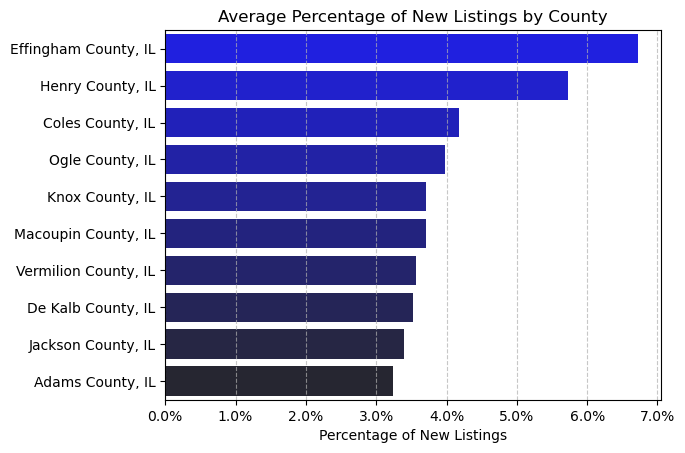

In [4]:
#group by county and take mean 
new_listings_mean = combined_listings_df.groupby('county_name')['new_listings'].mean().sort_values(ascending=False).reset_index().head(10)

sns.barplot(x='new_listings', y='county_name', data=new_listings_mean, orient='h', palette='dark:b_r')

plt.title('Average Percentage of New Listings by County')
plt.ylabel('')
plt.xlabel('Percentage of New Listings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x}%'))
plt.show()

# Compare County Average & Plot Distributions


In [6]:
# Group by 'county_name' and calculate the mean of 'new_listings'
average_new_listings_per_county = combined_listings_df.groupby(['county_name', 'year'])['new_listings'].mean()
# Display the result
print(average_new_listings_per_county)
anl_df = average_new_listings_per_county.to_frame(name='new_listings')
average_new_listings_per_county.info()


county_name           year
Adams County, IL      2017    -6.760000
                      2018     4.408333
                      2019     0.502500
                      2020     5.266667
                      2021     1.011667
                                ...    
Winnebago County, IL  2020     2.418333
                      2021     2.397500
                      2022    -1.256667
                      2023     1.256667
                      2024    11.048571
Name: new_listings, Length: 264, dtype: float64
<class 'pandas.core.series.Series'>
MultiIndex: 264 entries, ('Adams County, IL', 2017) to ('Winnebago County, IL', 2024)
Series name: new_listings
Non-Null Count  Dtype  
--------------  -----  
264 non-null    float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [7]:
# Define the counties you want to filter
target_counties = ['Cook County, IL', 'Du Page County, IL', 'Kane County, IL', 'Lake County, IL', 'Will County, IL']

# Filter the Series based on the first level of the index (county_name)
filtered_series = average_new_listings_per_county[average_new_listings_per_county.index.get_level_values('county_name').isin(target_counties)]
filtered_df = filtered_series.to_frame(name='new_listings')

print(filtered_df)

                         new_listings
county_name        year              
Cook County, IL    2017    -12.845000
                   2018      2.556667
                   2019      1.652500
                   2020      6.346667
                   2021      1.185833
                   2022     -1.010000
                   2023      2.120833
                   2024     14.450000
Du Page County, IL 2017    -15.518333
                   2018      2.879167
                   2019      4.567500
                   2020      7.977500
                   2021      0.696667
                   2022     -0.545000
                   2023      2.665000
                   2024     17.401429
Kane County, IL    2017    -14.946667
                   2018      1.635833
                   2019      5.703333
                   2020      4.182500
                   2021      0.952500
                   2022     -1.036667
                   2023      0.513333
                   2024     18.194286
Lake County,

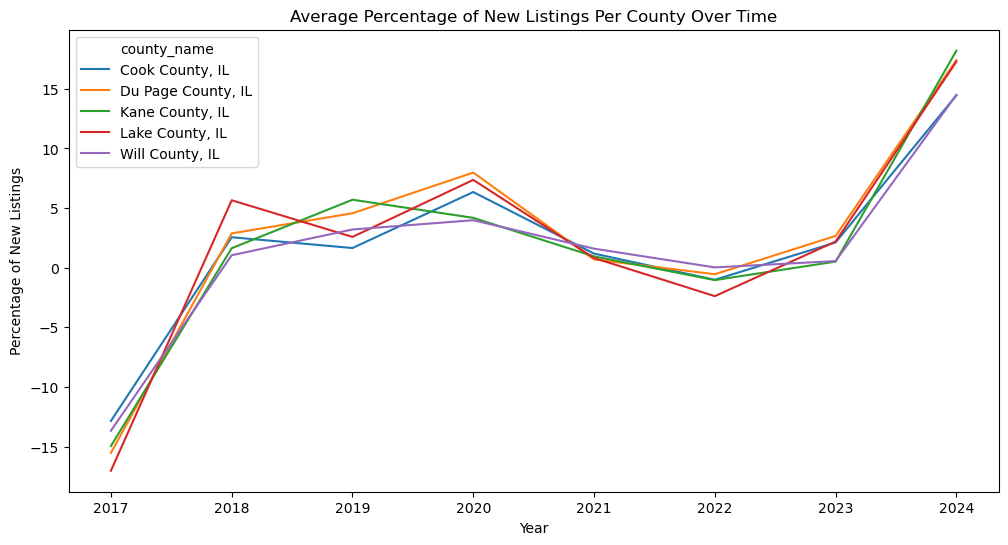

In [8]:
pivoted_data = filtered_df.pivot_table(index='year', columns='county_name', values='new_listings')
# Create the line plot
pivoted_data.plot(figsize=(12, 6))
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Percentage of New Listings')
plt.title('Average Percentage of New Listings Per County Over Time')
plt.show()

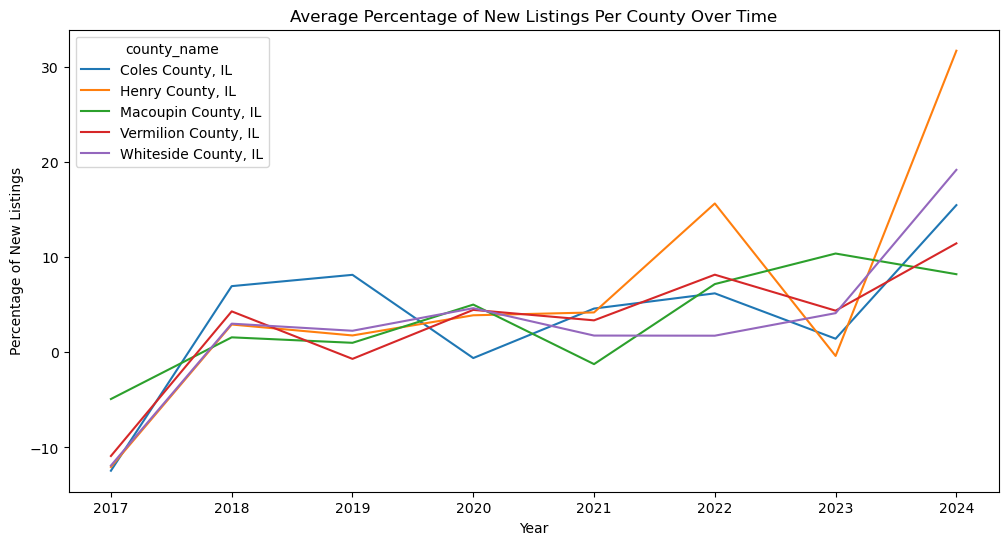

In [9]:
# Define the counties you want to filter
affordable_counties = ['Coles County, IL', 'Henry County, IL', 'Macoupin County, IL', 'Vermilion County, IL', 'Whiteside County, IL']

# Filter the Series based on the first level of the index (county_name)
filtered_afford_series = average_new_listings_per_county[average_new_listings_per_county.index.get_level_values('county_name').isin(affordable_counties)]
filtered_afford_df = filtered_afford_series.to_frame(name='new_listings')



pivoted_data = filtered_afford_df.pivot_table(index='year', columns='county_name', values='new_listings')
# Create the line plot
pivoted_data.plot(figsize=(12, 6))
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Percentage of New Listings')
plt.title('Average Percentage of New Listings Per County Over Time')
plt.show()

In [9]:
average_total_listings_per_county = combined_listings_df.groupby(['county_name'])['new_listings'].mean()
average_total_listings_per_county.sort_values(ascending=False)


county_name
Effingham County, IL      6.499643
Henry County, IL          5.973214
Coles County, IL          4.324524
Ogle County, IL           4.134167
Jackson County, IL        3.895714
Knox County, IL           3.759286
De Kalb County, IL        3.544881
Macoupin County, IL       3.491071
Vermilion County, IL      3.378810
Adams County, IL          3.240238
Stephenson County, IL     3.182738
Du Page County, IL        3.060119
Macon County, IL          3.037143
Grundy County, IL         2.987738
McLean County, IL         2.920238
Whiteside County, IL      2.878214
Lake County, IL           2.739881
Williamson County, IL     2.624286
McHenry County, IL        2.546310
La Salle County, IL       2.377857
Kane County, IL           2.286071
Cook County, IL           2.220357
Champaign County, IL      2.190000
Kendall County, IL        2.083810
Tazewell County, IL       1.780238
Will County, IL           1.774167
Kankakee County, IL       1.757381
Rock Island County, IL    1.741071
Sangamon

In [10]:
merged_df = pd.merge(combined_listings_df, average_new_listings_per_county, on='county_name')


filtered_df = merged_df[merged_df['new_listings_x'] > merged_df['new_listings_y']]
print(filtered_df)


            Date  new_listings_x           county_name month  year  \
0     2017-07-01            2.70      Adams County, IL   Jul  2017   
2     2017-07-01            2.70      Adams County, IL   Jul  2017   
4     2017-07-01            2.70      Adams County, IL   Jul  2017   
8     2017-08-01            0.00      Adams County, IL   Aug  2017   
16    2017-09-01            5.26      Adams County, IL   Sep  2017   
...          ...             ...                   ...   ...   ...   
22170 2024-06-01            6.33  Winnebago County, IL   Jun  2024   
22171 2024-06-01            6.33  Winnebago County, IL   Jun  2024   
22172 2024-06-01            6.33  Winnebago County, IL   Jun  2024   
22173 2024-06-01            6.33  Winnebago County, IL   Jun  2024   
22174 2024-06-01            6.33  Winnebago County, IL   Jun  2024   

       new_listings_y  
0           -6.760000  
2            0.502500  
4            1.011667  
8           -6.760000  
16          -6.760000  
...            

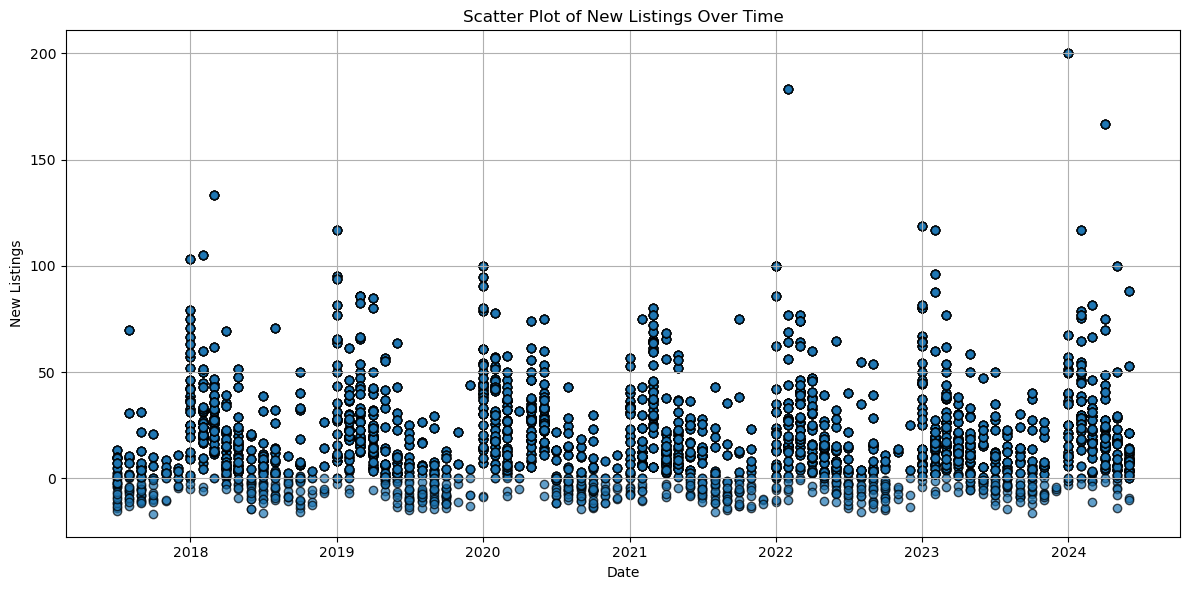

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(filtered_df['Date'], filtered_df['new_listings_x'], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot of New Listings Over Time')
plt.xlabel('Date')
plt.ylabel('New Listings')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
anl_df.columns
print(anl_df)

                           new_listings
county_name          year              
Adams County, IL     2017     -6.760000
                     2018      4.408333
                     2019      0.502500
                     2020      5.266667
                     2021      1.011667
...                                 ...
Winnebago County, IL 2020      2.418333
                     2021      2.397500
                     2022     -1.256667
                     2023      1.256667
                     2024     13.881667

[264 rows x 1 columns]


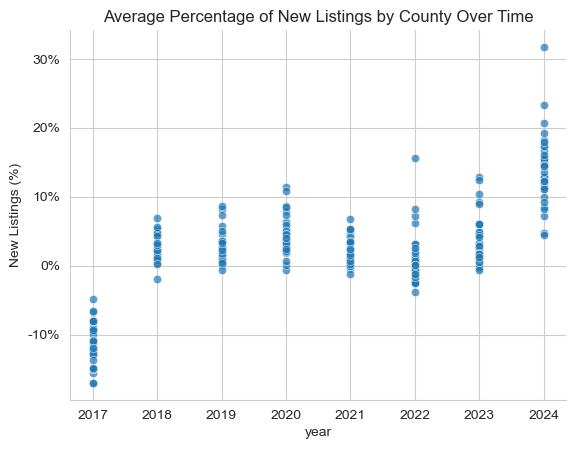

In [10]:
sns.set_style("whitegrid")
# Create the scatter plot
sns.scatterplot(x='year', y='new_listings', data=anl_df, alpha=0.7)
plt.xlabel('year')
plt.ylabel('New Listings (%)')
plt.title('Average Percentage of New Listings by County Over Time')
sns.despine() 
plt.grid(True)
# Format y axis with %
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f"{y:.0f}%"))
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_13756\3021410642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date_ordinal'] = filtered_df['Date'].apply(lambda x: x.toordinal())
C:\Users\kevin\AppData\Local\Temp\ipykernel_13756\3021410642.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  date_range = pd.date_range(start=filtered_df['Date'].min(), end=filtered_df['Date'].max(), freq='Y')


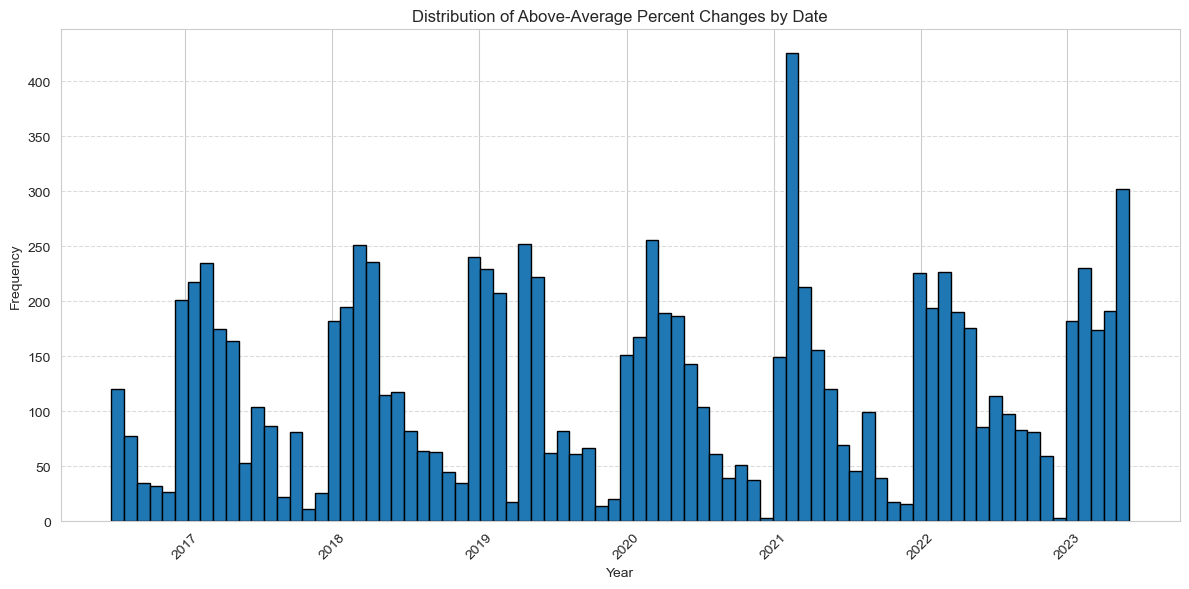

In [14]:
# Convert Date to ordinal
filtered_df['Date_ordinal'] = filtered_df['Date'].apply(lambda x: x.toordinal())

# Plotting
plt.figure(figsize=(12, 6))

# Create histogram with ordinal dates
plt.hist(filtered_df['Date_ordinal'], bins=80, edgecolor='black')

# Set plot title and labels
plt.title('Distribution of Above-Average Percent Changes by Date')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Formatting x-axis to show years
# Convert ordinal values back to years for x-ticks
date_range = pd.date_range(start=filtered_df['Date'].min(), end=filtered_df['Date'].max(), freq='Y')
x_ticks = [d.toordinal() for d in date_range]
x_labels = [d.strftime('%Y') for d in date_range]

plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Population Data

In [4]:
population_data = pd.read_csv(r'C:/Users/kevin/Documents/analysis_docs/Illinois_Housing_Affordability/csv_files/Counties.csv')
fred = fa.Fred(api_key=api_key)

# Create an empty list to store DataFrames
population_dataframes = []

# Loop through county data and fetch data from FRED
for index, row in population_data.iterrows():
    county_name = row['county_name']
    county_id = row['population']

    try:
        population_data = fred.get_series(county_id)
        population_data = population_data.to_frame(name='population')  # Ensure data is in a DataFrame       
        population_data['county_name'] = county_name
        population_data['year'] = population_data.index.year
        mask = population_data['year'].apply(lambda x: x > 2015)
        filter_data = population_data[mask]
        population_dataframes.append(filter_data)
    except Exception as e:
        print(f"Error retrieving data for {county_name}: {e}")

# Combine DataFrames
combined_pop_df = pd.concat(population_dataframes)
combined_pop_df = combined_pop_df.reset_index()
combined_pop_df.rename(columns={'index': 'Date'}, inplace=True)


print(combined_pop_df)

          Date  population           county_name  year
0   2016-01-01      66.490      Adams County, IL  2016
1   2017-01-01      66.073      Adams County, IL  2017
2   2018-01-01      65.603      Adams County, IL  2018
3   2019-01-01      65.402      Adams County, IL  2019
4   2020-01-01      65.614      Adams County, IL  2020
..         ...         ...                   ...   ...
259 2019-01-01     282.465  Winnebago County, IL  2019
260 2020-01-01     284.916  Winnebago County, IL  2020
261 2021-01-01     283.333  Winnebago County, IL  2021
262 2022-01-01     281.542  Winnebago County, IL  2022
263 2023-01-01     280.922  Winnebago County, IL  2023

[264 rows x 4 columns]


In [8]:
# Group by 'county_name' and calculate the mean of 'population'
population_per_county = combined_pop_df.groupby(['county_name', 'year'])['population'].mean()

# Define the counties you want to filter
target_pop_counties = ['Coles County, IL', 'Henry County, IL', 'Macoupin County, IL', 'Vermilion County, IL', 'Whiteside County, IL']
least_pop_counties = ['Du Page County, IL', 'Kane County, IL', 'Lake County, IL', 'Will County, IL']
# Filter the Series based on the first level of the index (county_name)
filtered_pop_series = population_per_county[population_per_county.index.get_level_values('county_name').isin(target_pop_counties)]
filtered_pop_df = filtered_pop_series.to_frame(name='population')
filtered_least = population_per_county[population_per_county.index.get_level_values('county_name').isin(least_pop_counties)]
filtered_least_df = filtered_least.to_frame(name='population')
# Calculate the mean of the entire group
mean_population = filtered_pop_df.groupby('year')['population'].mean()
mean_population = mean_population.to_frame(name='population')
mean_least = filtered_least_df.groupby('year')['population'].mean()
mean_least = mean_least.to_frame(name='population')




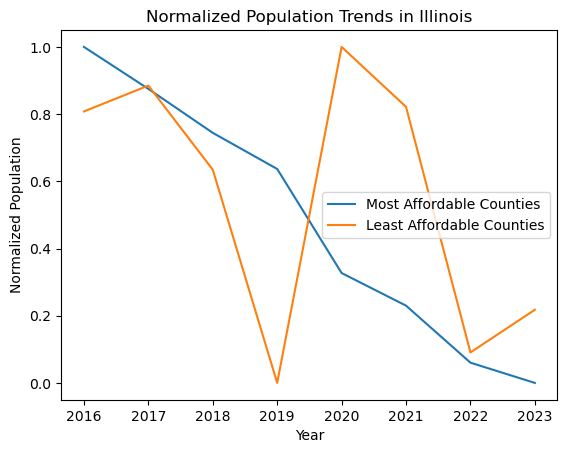

In [9]:
def normalize(df):
  return (df - df['population'].min()) / (df['population'].max() - df['population'].min())

normalized_affordable = normalize(mean_population.copy())
normalized_least = normalize(mean_least.copy())

# Plot the normalized data
plt.plot(normalized_affordable['population'], label='Most Affordable Counties')
plt.plot(normalized_least['population'], label='Least Affordable Counties')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Normalized Population')
plt.title('Normalized Population Trends in Illinois')
plt.show()



Text(0.5, 1.0, 'Population by County Over Time')

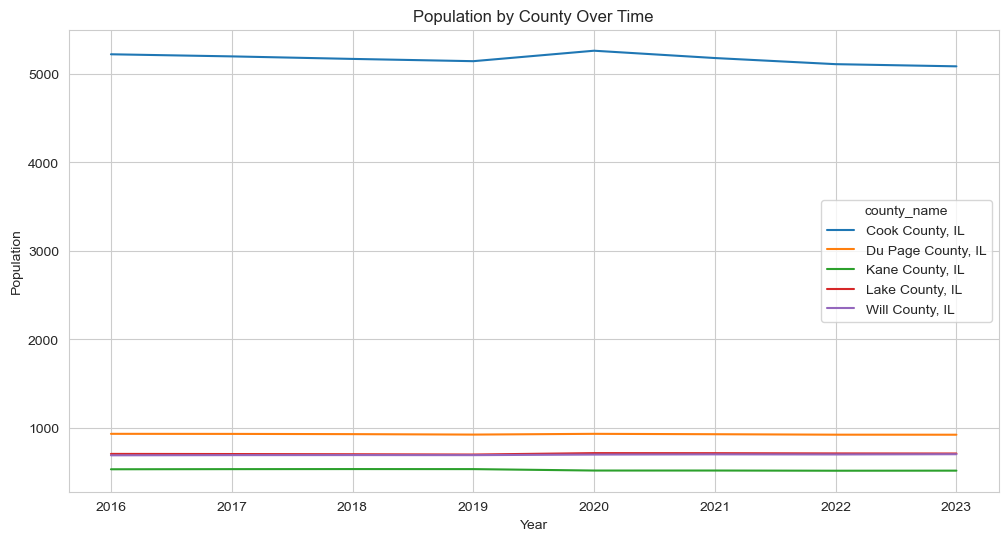

In [18]:
# Group by 'county_name' and calculate the mean of 'new_listings'
population_per_expensive_county = combined_pop_df.groupby(['county_name', 'year'])['population'].mean()
# Define the counties you want to filter
expensive_pop_counties = ['Cook County, IL', 'Du Page County, IL', 'Kane County, IL', 'Lake County, IL', 'Will County, IL']

# Filter the Series based on the first level of the index (county_name)
expensive_pop_series = population_per_expensive_county[population_per_expensive_county.index.get_level_values('county_name').isin(expensive_pop_counties)]
expensive_pop_df = expensive_pop_series.to_frame(name='population')

# Pivot the data
pivot_expensive_pop_data = expensive_pop_df.pivot_table(index='year', columns='county_name', values='population')
# Create the line plot
pivot_expensive_pop_data.plot(figsize=(12, 6))
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by County Over Time')

In [19]:
county_pop = combined_pop_df.groupby('county_name')['population'].mean().sort_values()
print(county_pop)

county_name
Effingham County, IL        34.316625
Stephenson County, IL       44.351125
Macoupin County, IL         44.892375
Coles County, IL            48.863875
Henry County, IL            48.983750
Knox County, IL             49.667500
Ogle County, IL             51.177875
Grundy County, IL           51.899625
Jackson County, IL          55.128125
Whiteside County, IL        55.397625
Adams County, IL            65.405375
Williamson County, IL       66.934625
Vermilion County, IL        74.949000
De Kalb County, IL         102.464000
Macon County, IL           103.587375
Kankakee County, IL        108.354375
La Salle County, IL        109.059875
Kendall County, IL         131.514375
Tazewell County, IL        131.561375
Rock Island County, IL     142.897000
McLean County, IL          171.622875
Peoria County, IL          180.546875
Sangamon County, IL        195.636125
Champaign County, IL       208.113500
St. Clair County, IL       257.871000
Madison County, IL         264.526625


In [20]:
population_per_county.columns()

AttributeError: 'Series' object has no attribute 'columns'

KeyError: 'year'

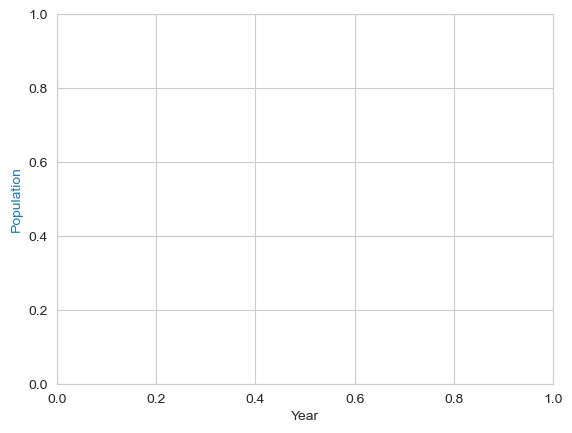

In [ ]:
# Create the figure and axes
fig, ax1 = plt.subplots()

# Plot the first dataset on the first axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(population_per_county['year'], population_per_county['population'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second axis
ax2 = ax1.twinx()

# Plot the second dataset on the second axis
color = 'tab:red'
ax2.set_ylabel('New Listings', color=color)
ax2.plot(anl_df['year'], anl_df['new_listings'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adjust layout
fig.tight_layout()

plt.show()